In [1]:
import pandas as pd
csv_train = '/mnt/data/lossless_train_04102022_crops_sizes.csv'
csv_test = '/mnt/data/lossless_val_04102022_crops_sizes.csv'

In [2]:
df = pd.read_csv(csv_train, sep=',')
df

                                                      file  spoof     size
0        /mnt/data/lossless_train_04102022_crops/1/many...      1  12818.0
1        /mnt/data/lossless_train_04102022_crops/1/edge...      1  18722.0
2        /mnt/data/lossless_train_04102022_crops/0/abdf...      0  18875.0
3        /mnt/data/lossless_train_04102022_crops/1/droi...      1  12061.0
4        /mnt/data/lossless_train_04102022_crops/0/bfe6...      0  20401.0
...                                                    ...    ...      ...
5644715  /mnt/data/lossless_train_04102022_crops/0/ccda...      0  18924.0
5644716  /mnt/data/lossless_train_04102022_crops/0/0eb3...      0  19079.0
5644717  /mnt/data/lossless_train_04102022_crops/0/91e7...      0  23125.0
5644718  /mnt/data/lossless_train_04102022_crops/0/2e41...      0  22439.0
5644719  /mnt/data/lossless_train_04102022_crops/1/olda...      1  28509.0

[5644720 rows x 3 columns]


<AxesSubplot: >

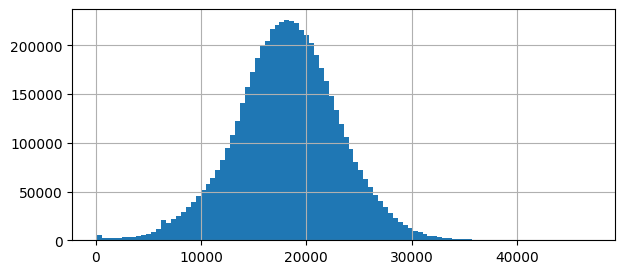

In [3]:
df['size'].hist(bins = 100, figsize = (7, 3))

<AxesSubplot: >

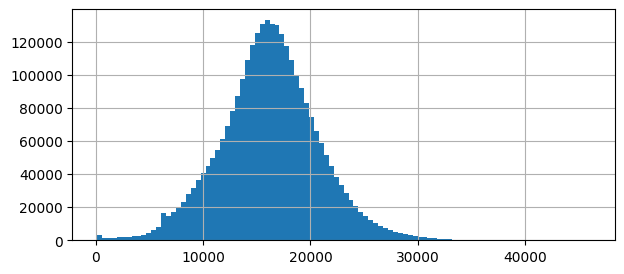

In [5]:
df[df['spoof'] == 1]['size'].hist(bins = 100, figsize = (7, 3))

<AxesSubplot: >

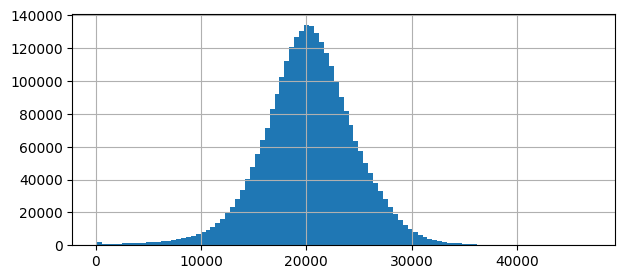

In [6]:
df[df['spoof'] == 0]['size'].hist(bins = 100, figsize = (7, 3))